In [148]:
import random

In [149]:
from fastbook import *


In [150]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Dataset


In [402]:
path = untar_data(URLs.MNIST)

In [403]:
Path.BASE_PATH = path

In [407]:
path.ls()

(#3) [Path('testing'),Path('training'),Path('validation')]

In [154]:
(path/"training").ls()

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

In [406]:
paths=(path/"validaiton")
paths.rmdir()


Path('.')

In [156]:
train_path=(path/"training")
valid_path=(path/"validation")
classes=['0','1','2','3','4','5','6','7','8','9']

valid_perc=0.2


In [157]:
for cls in classes:
    files = (train_path/cls).ls().sorted()
    num_val = int(len(files)*valid_perc)
    val_samples = random.sample(files, num_val)
    
    for file in val_samples:
        new_path = valid_path/cls/file.name
        new_path.parent.mkdir(parents=True, exist_ok=True)
        shutil.move(file, new_path)

In [158]:
(path/"validation").ls()

(#10) [Path('validation/0'),Path('validation/1'),Path('validation/2'),Path('validation/3'),Path('validation/4'),Path('validation/5'),Path('validation/6'),Path('validation/7'),Path('validation/8'),Path('validation/9')]

In [159]:
zero=(path/'training'/'0').ls().sorted()
one=(path/'training'/'1').ls().sorted()
two=(path/'training'/'2').ls().sorted()
three=(path/'training'/'3').ls().sorted()
four=(path/'training'/'4').ls().sorted()
five=(path/'training'/'5').ls().sorted()
six=(path/'training'/'6').ls().sorted()
seven=(path/'training'/'7').ls().sorted()
eight=(path/'training'/'8').ls().sorted()
nine=(path/'training'/'9').ls().sorted()



In [449]:
zero_val=(path/'validation'/'0').ls().sorted()
one_val=(path/'validation'/'1').ls().sorted()
two_val=(path/'validation'/'2').ls().sorted()
three_val=(path/'validation'/'3').ls().sorted()
four_val=(path/'validation'/'4').ls().sorted()
five_val=(path/'validation'/'5').ls().sorted()
six_val=(path/'validation'/'6').ls().sorted()
seven_val=(path/'validation'/'7').ls().sorted()
eight_val=(path/'validation'/'8').ls().sorted()
nine_val=(path/'validation'/'9').ls().sorted()



In [450]:
zero_test=(path/'testing'/'0').ls().sorted()
one_test=(path/'testing'/'1').ls().sorted()
two_test=(path/'testing'/'2').ls().sorted()
three_test=(path/'testing'/'3').ls().sorted()
four_test=(path/'testing'/'4').ls().sorted()
five_test=(path/'testing'/'5').ls().sorted()
six_test=(path/'testing'/'6').ls().sorted()
seven_test=(path/'testing'/'7').ls().sorted()
eight_test=(path/'testing'/'8').ls().sorted()
nine_test=(path/'testing'/'9').ls().sorted()

In [162]:
nine_val

(#2902) [Path('validation/9/10003.png'),Path('validation/9/10004.png'),Path('validation/9/10023.png'),Path('validation/9/10038.png'),Path('validation/9/10043.png'),Path('validation/9/10047.png'),Path('validation/9/10059.png'),Path('validation/9/10088.png'),Path('validation/9/10102.png'),Path('validation/9/10105.png')...]

In [163]:
imgzero_path = zero[1]
img0= Image.open(imgzero_path)
img0

The Image class is from Python Imaging Library(PIL).

# Image In Computer

Image is represented as numbers more specifically set of numbers in computer.To view, the number/values we have to use NumPy array or a pytorch tensor.

In [164]:
arr_img0=array(img0)

In [165]:
arr_img0.shape

(28, 28)

In [166]:
arr_img0.shape
"""The shape shows the dimension of the matrix, in this case it is 28*28 matrix which also
means there are 784 values in the matrix. Since it is kept in an array, we can also index it as we like.
"""
indexed_array=arr_img0[4:10] #indexing 4-9 rows and all columns
indexed_array.shape

(6, 28)

In [167]:
tensor_0 = tensor(img0)
tensor_0.shape

torch.Size([28, 28])

In [168]:
indexed_tensor =  tensor_0[4:10]
indexed_tensor.shape

torch.Size([6, 28])

In [169]:
df= pd.DataFrame(tensor_0)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,146,254,255,251,95,6,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,3,97,234,254,254,232,254,254,35,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,89,140,254,254,174,67,33,200,254,190,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,108,253,254,235,51,1,0,0,12,254,253,56,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,12,216,254,244,55,0,0,0,0,6,213,254,57,0,0,0,0,0,0


In [170]:
df.style.set_properties(**{'font-size':'5pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,146,254,255,251,95,6,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,3,97,234,254,254,232,254,254,35,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,89,140,254,254,174,67,33,200,254,190,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,108,253,254,235,51,1,0,0,12,254,253,56,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,12,216,254,244,55,0,0,0,0,6,213,254,57,0,0,0,0,0,0


# Pixel Similarity Approach

Pixel Similarity Approach, we find out the average pixel value for every pixel of each numbers.This will gives us 10 group averages, the average will define the ideal digit. Now to classify an image, we check which of the digit is this image most similar to. This will be a good baseline model .

jargon: Baseline: A simple model which you are confident should perform reasonably well. It should be very simple to implement, and very easy to test, so that you can then test each of your improved ideas, and make sure they are always better than your baseline. Without starting with a sensible baseline, it is very difficult to know whether your super-fancy models are actually any good. One good approach to creating a baseline is doing what we have done here: think of a simple, easy-to-implement model. Another good approach is to search around to find other people that have solved similar problems to yours, and download and run their code on your dataset. Ideally, try both of these!

## Stacking Images


In [171]:
one_tensors = [tensor(Image.open(o)) for o in one]
zero_tensors = [tensor(Image.open(o)) for o in zero]
two_tensors = [tensor(Image.open(o)) for o in two]
three_tensors = [tensor(Image.open(o)) for o in three]
four_tensors = [tensor(Image.open(o)) for o in four]
five_tensors = [tensor(Image.open(o)) for o in five]
six_tensors = [tensor(Image.open(o)) for o in six]
seven_tensors = [tensor(Image.open(o)) for o in seven]
eight_tensors = [tensor(Image.open(o)) for o in eight]
nine_tensors = [tensor(Image.open(o)) for o in nine]

Primary purpose is to compute average pixel value for every pixel position.

In [172]:
len(zero_tensors)


3034

### Stacking Every Images Individual Tensor In A Single Tensor.

In [173]:
# The Conversion of float, is for finding out mean,usually when finding mean, it is required for the data to be float.
# The divided by 255 is for normalization, this is so that every value ranges from 0-1, less std.Faster computation. 
stacked_zeros = torch.stack(zero_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_two = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_six = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255

In [174]:

"""5923 is the toal number of images and each image has dimension 28*28"""
stacked_zeros.shape 

torch.Size([3034, 28, 28])

Lets talk about, rank length and shape.

An matrix is 2 dimensional since it has two dimension row and column.
Vector Is 1 dimensional.
The easisest way to get number of dimesion is using .ndim

In [175]:
"""See it's three dimesional, so we need three indices to actually fetch any one data from the stack"""
stacked_zeros.ndim


3

In [176]:
a=tensor([1,2])
a.ndim

1

#### Computing Mean

<AxesSubplot:>

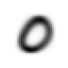

In [177]:
mean0= stacked_zeros.mean(0)
show_image(mean0)

<AxesSubplot:>

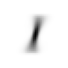

In [178]:
mean1= stacked_ones.mean(0)
show_image(mean1)

<AxesSubplot:>

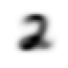

In [179]:
mean2= stacked_two.mean(0)
show_image(mean2)

<AxesSubplot:>

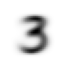

In [180]:
mean3=stacked_threes.mean(0)
show_image(mean3)

<AxesSubplot:>

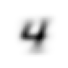

In [181]:
mean4=stacked_fours.mean(0)
show_image(mean4)

<AxesSubplot:>

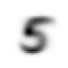

In [182]:
mean5=stacked_fives.mean(0)
show_image(mean5)

<AxesSubplot:>

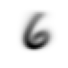

In [183]:
mean6=stacked_six.mean(0)
show_image(mean6)

<AxesSubplot:>

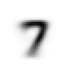

In [184]:
mean7=stacked_sevens.mean(0)
show_image(mean7)

<AxesSubplot:>

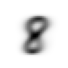

In [185]:
mean8=stacked_eights.mean(0)
show_image(mean8)

<AxesSubplot:>

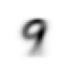

In [186]:
mean9=stacked_nines.mean(0)
show_image(mean9)

In [187]:
tensor_mean0= tensor(mean0)

df_0= pd.DataFrame(tensor_mean0)
df_0
df_0.style.set_properties(**{'font-size':'5pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000116,0.000318,0.000151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000037,0.000013,0.000000,0.000110,0.000034,0.000000,0.000000,0.000000,0.000000,0.000066,0.000476,0.000150,0.000000,0.000058,0.000003,0.000098,0.000176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000109,0.000160,0.000327,0.000327,0.000118,0.000078,0.000854,0.002003,0.004906,0.007035,0.009455,0.013639,0.017619,0.016550,0.012150,0.009081,0.007578,0.005977,0.003659,0.001525,0.000368,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000031,0.000259,0.000655,0.001750,0.004435,0.013529,0.027435,0.054840,0.100274,0.157985,0.210657,0.251989,0.257830,0.236734,0.190593,0.135820,0.081748,0.042703,0.018194,0.004069,0.000699,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000305,0.000679,0.003225,0.007554,0.017414,0.044399,0.094375,0.172646,0.278778,0.397807,0.496876,0.560775,0.586392,0.547531,0.461681,0.346305,0.222128,0.121875,0.054272,0.014381,0.002089,0.000016,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000918,0.004088,0.008837,0.018168,0.046238,0.107037,0.205245,0.332859,0.471201,0.598347,0.687572,0.739123,0.754943,0.738177,0.669515,0.541877,0.393038,0.241458,0.118292,0.038692,0.004938,0.000176,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000960,0.006395,0.015381,0.041412,0.099438,0.203088,0.340004,0.487283,0.610847,0.690691,0.735794,0.743288,0.748031,0.755343,0.740727,0.667323,0.535166,0.373676,0.208842,0.078349,0.013967,0.000480,0.000000,0.000000
8,0.000000,0.000000,0.000050,0.000061,0.001298,0.007582,0.028298,0.080325,0.176507,0.319179,0.476017,0.599511,0.674417,0.684999,0.656068,0.620461,0.605953,0.623297,0.667707,0.684914,0.629413,0.486479,0.310139,0.133230,0.027545,0.000321,0.000000,0.000000
9,0.000000,0.000000,0.000021,0.000026,0.001875,0.013591,0.055246,0.142229,0.275139,0.442142,0.582339,0.661191,0.661983,0.599445,0.508411,0.433114,0.396249,0.424339,0.511540,0.615024,0.649574,0.570861,0.402221,0.196381,0.045273,0.000848,0.000000,0.000000


In [188]:
df
df.style.set_properties(**{'font-size':'5pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,146,254,255,251,95,6,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,3,97,234,254,254,232,254,254,35,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,89,140,254,254,174,67,33,200,254,190,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,108,253,254,235,51,1,0,0,12,254,253,56,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,12,216,254,244,55,0,0,0,0,6,213,254,57,0,0,0,0,0,0


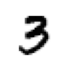

In [189]:
a_3 = stacked_threes[1]
show_image(a_3);

In [190]:
dist_3_abs = (a_3 -mean3).abs().mean() #absolute mean square or l1 norm

In [191]:
dist_3_sqr = ((a_3-mean3)**2).mean().sqrt() #RMSE or l2 norm

In [192]:
dist_3_abs,dist_3_sqr #shows the difference in distance between each pixels


(tensor(0.1154), tensor(0.2059))

In [193]:
dist_0_abs = (a_3 - mean0).abs().mean()
dist_0_sqr = ((a_3 - mean0)**2).mean().sqrt()
dist_0_abs,dist_0_sqr

(tensor(0.1761), tensor(0.3050))

In [194]:
dist_1_abs = (a_3 - mean1).abs().mean()
dist_1_sqr = ((a_3 - mean1)**2).mean().sqrt()
dist_1_abs,dist_1_sqr

(tensor(0.1555), tensor(0.3248))

In [195]:
dist_2_abs = (a_3 - mean2).abs().mean()
dist_2_sqr = ((a_3 - mean2)**2).mean().sqrt()
dist_2_abs,dist_2_sqr

(tensor(0.1644), tensor(0.2862))

In [196]:
dist_4_abs = (a_3 - mean4).abs().mean()
dist_4_sqr = ((a_3 - mean4)**2).mean().sqrt()
dist_4_abs,dist_4_sqr

(tensor(0.1633), tensor(0.3055))

In [197]:
dist_5_abs = (a_3 - mean5).abs().mean()
dist_5_sqr = ((a_3 - mean5)**2).mean().sqrt()
dist_5_abs,dist_5_sqr

(tensor(0.1488), tensor(0.2658))

In [198]:
dist_6_abs = (a_3 - mean6).abs().mean()
dist_6_sqr = ((a_3 - mean6)**2).mean().sqrt()
dist_6_abs,dist_6_sqr

(tensor(0.1697), tensor(0.3098))

In [199]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1670), tensor(0.3169))

In [200]:
dist_8_abs = (a_3 - mean8).abs().mean()
dist_8_sqr = ((a_3 - mean8)**2).mean().sqrt()
dist_8_abs,dist_8_sqr

(tensor(0.1440), tensor(0.2570))

In [201]:
dist_9_abs = (a_3 - mean9).abs().mean()
dist_9_sqr = ((a_3 - mean9)**2).mean().sqrt()
dist_9_abs,dist_9_sqr

(tensor(0.1529), tensor(0.2911))

We can see, that distance between image of 3 and "ideal 3" is less than the distance to other ideal digits.

# Using Pytorch Loss

In [202]:
F.l1_loss(a_3.float(), mean0),F.l1_loss(a_3.float(), mean1),F.l1_loss(a_3.float(), mean2),F.l1_loss(a_3.float(), mean3),F.l1_loss(a_3.float(), mean4),F.l1_loss(a_3.float(), mean5),F.l1_loss(a_3.float(), mean6),F.l1_loss(a_3.float(), mean7),F.l1_loss(a_3.float(), mean8),F.l1_loss(a_3.float(), mean9) 

(tensor(0.1761),
 tensor(0.1555),
 tensor(0.1644),
 tensor(0.1154),
 tensor(0.1633),
 tensor(0.1488),
 tensor(0.1697),
 tensor(0.1670),
 tensor(0.1440),
 tensor(0.1529))

In [203]:
F.mse_loss(a_3, mean7).sqrt(), F.mse_loss(a_3, mean3).sqrt() # mse will penalize bigger mistakes more heavily.

(tensor(0.3169), tensor(0.2059))

# Numpy array VS Pytorch tensors

Python is slow compared to many languages. Anything fast in Python, NumPy, or PyTorch is likely to be a wrapper for a compiled object written (and optimized) in another language—specifically C. In fact, NumPy arrays and PyTorch tensors can finish computations many thousands of times faster than using pure Python.

A numpy array is a multidimensional table of data, with all items of same type.It can also be an array of arrays. There is a type of array in which the innermost arrays are of different sizes which are called jagged array.If the items are all of some simple type such as integer or float, then NumPy will store them as a compact C data structure in memory. This is where NumPy shines. NumPy has a wide variety of operators and methods that can run computations on these compact structures at the same speed as optimized C, because they are written in optimized C.

A PyTorch tensor is as same as NumPy array, but with an additional restriction that unlocks additional capabilities. The restriction is that a tensor cannot use just any old type—it has to use a single basic numeric type for all components. For example, a PyTorch tensor cannot be jagged. It is always a regularly shaped multidimensional rectangular structure.The vast majority of methods and operators supported by NumPy on these structures are also supported by PyTorch, but PyTorch tensors have additional capabilities. One major capability is that these structures can live on the GPU, in which case their computation will be optimized for the GPU and can run much faster (given lots of values to work on). In addition, PyTorch can automatically calculate derivatives of these operations, including combinations of operations. 

# Computing Metrics Using Broadcasting

Metrics used for understanding how well the model performed, for now we are using how many of the image labels were correctly predicted.

Broadcasting in python allows to perform opearations on different shaped tensors by expanding the shape of the smaller tensor in such a way that allows operations with the larger tensors.

In [204]:
(path/'testing').ls()

(#10) [Path('testing/0'),Path('testing/1'),Path('testing/2'),Path('testing/3'),Path('testing/4'),Path('testing/5'),Path('testing/6'),Path('testing/7'),Path('testing/8'),Path('testing/9')]

In [205]:
valid_0_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'0').ls()])
valid_0_tens = valid_0_tens.float()/255
valid_1_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'1').ls()])
valid_1_tens = valid_1_tens.float()/255
valid_2_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'2').ls()])
valid_2_tens = valid_2_tens.float()/255
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_4_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'4').ls()])
valid_4_tens = valid_4_tens.float()/255
valid_5_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'5').ls()])
valid_5_tens = valid_5_tens.float()/255
valid_6_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'6').ls()])
valid_6_tens = valid_6_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_8_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'8').ls()])
valid_8_tens = valid_8_tens.float()/255
valid_9_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'validation'/'9').ls()])
valid_9_tens = valid_9_tens.float()/255


In [206]:
len(valid_3_tens.shape),valid_7_tens.shape

(3, torch.Size([3057, 28, 28]))

## Loss Function

In [207]:
def mnist_distance(a,b): return (a-b).abs().mean((-2,-1))

In [208]:
valid_3_tens.shape, mean3.shape

(torch.Size([2991, 28, 28]), torch.Size([28, 28]))

In [209]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape #brodcasting is done.
"""shape of valid_3_tens is (1226,28,28) but theshape of mean3 is (28*28) since the trailing dimesnions
are same, mean3 is broadcasted to (1226*28*28) and then the operation is performed"""

'shape of valid_3_tens is (1226,28,28) but theshape of mean3 is (28*28) since the trailing dimesnions\nare same, mean3 is broadcasted to (1226*28*28) and then the operation is performed'

In [210]:
def is_0(x): 
    a=mnist_distance(x,mean3) < mnist_distance(x,mean7)
    return a.shape

In [211]:
mnist_distance(valid_3_tens,mean3).shape

torch.Size([2991])

In [212]:
def is_0(x):
    dist_0=mnist_distance(x,mean0)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=0 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_0 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [213]:
def is_1(x):
    dist_1=mnist_distance(x,mean1)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=1 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_1 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [214]:
def is_2(x):
    dist_2=mnist_distance(x,mean2)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=2 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_2 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [215]:
def is_3(x):
    dist_3=mnist_distance(x,mean3)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=3 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_3 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [216]:
def is_4(x):
    dist_4=mnist_distance(x,mean4)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=4 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_4 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [217]:
def is_5(x):
    dist_5=mnist_distance(x,mean5)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=5 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_5 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [218]:
def is_6(x):
    dist_6=mnist_distance(x,mean6)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=6 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_6 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [219]:
def is_7(x):
    dist_7=mnist_distance(x,mean7)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=7 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_7 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [220]:
def is_8(x):
    dist_8=mnist_distance(x,mean8)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=8 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_8 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [221]:
def is_9(x):
    dist_9=mnist_distance(x,mean9)
    other_means = [globals()[f"mean{i}"] for i in range(10) if i!=9 ]
    other_distances = torch.stack([mnist_distance(x, mean) for mean in other_means])
    # Element-wise comparison
    comparisons = dist_9 < other_distances
    
    # Transpose the comparisons tensor
    
     # Check if all comparisons are True across all dimensions of x
    all_true = torch.all(comparisons, dim=0)
    return all_true


In [222]:
is_3(valid_3_tens)

tensor([ True,  True, False,  ...,  True, False,  True])

In [223]:
(1-is_3(valid_7_tens).float()).mean()

tensor(1.)

In [224]:
is_0(valid_3_tens)

tensor([False, False, False,  ..., False, False, False])

In [225]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = is_7(valid_7_tens).float().mean()
accuracy_1s =      is_1(valid_1_tens).float() .mean()
accuracy_0s =      is_0(valid_0_tens).float() .mean()
accuracy_2s = is_2(valid_2_tens).float().mean()
accuracy_4s = is_4(valid_4_tens).float().mean()
accuracy_5s =      is_5(valid_5_tens).float() .mean()
accuracy_6s = is_6(valid_6_tens).float().mean()
accuracy_8s =      is_8(valid_8_tens).float() .mean()
accuracy_9s = is_9(valid_9_tens).float().mean()

acc=(accuracy_3s+accuracy_7s+accuracy_6s+accuracy_5s+accuracy_4s+accuracy_8s+accuracy_9s+accuracy_2s+accuracy_1s+accuracy_0s)/10

In [226]:
overall_acc=acc*100
overall_acc # thats bad acc lets use it as a baseline model and compare it with othe model accs.

tensor(64.5109)

## SGD

### Caculating Grad

The derivative of a function tells you how much a change in its parameters will change its result.It calculates the change, rather than the value. For instance, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3.More specifically, you may recall that gradient is defined as rise/run, that is, the change in the value of the function, divided by the change in the value of the parameter. When we know how our function will change, then we know what we need to do to make it smaller.

In [227]:
def f(x): return x**2

In [228]:
xt = tensor(3.).requires_grad_()

In [229]:
yt=f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [230]:
yt.backward()

In [231]:
xt.grad #derivative of x**2 is 2x and xt=3 so 2*3 is 6.
"Backprogagtion"

'Backprogagtion'

### Stepping With A Learning Rate (After Caculating gradients)

Deciding how to change our parameters based on the values of the gradients is an important part of the deep learning process. Nearly all approaches start with the basic idea of multiplying the gradient by some small number, called the learning rate (LR). The learning rate is often a number between 0.001 and 0.1, although it could be anything.

Once you've picked a learning rate, you can adjust your parameters using this simple function:

w -= gradient(w) * lr

### An End-to-End SGD Example

Let's start with a simple, synthetic, example model. Imagine you were measuring the speed of a roller coaster as it went over the top of a hump. It would start fast, and then get slower as it went up the hill; it would be slowest at the top, and it would then speed up again as it went downhill. You want to build a model of how the speed changes over time. If you were measuring the speed manually every second for 20 seconds, it might look something like this:

In [232]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

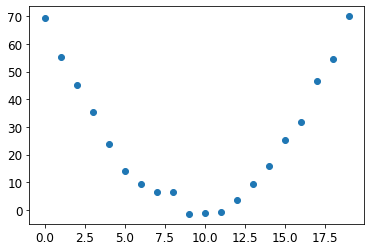

In [233]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
speed
plt.scatter(time,speed);

In [234]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [235]:
def mse(preds, targets): return ((preds-targets)**2).mean()

##### Initialize the params

In [236]:
params = torch.randn(3).requires_grad_()

In [237]:
#hide
orig_params = params.clone()

##### Calc the preds

In [238]:
preds = f(time, params)

In [239]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
   

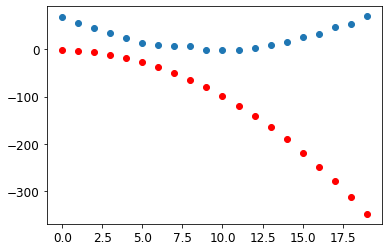

In [240]:
show_preds(preds)

#### Calculate the loss

In [241]:
loss = mse(preds,speed)
loss

tensor(35323.6562, grad_fn=<MeanBackward0>)

#### calculate the grad

In [242]:
loss.backward()
params.grad

tensor([-62407.6406,  -4008.1785,   -294.3875])

In [243]:
params.grad * 1e-5 // 0.00001

tensor([-62408.,  -4009.,   -295.])

In [244]:
params

tensor([-0.9508, -0.1684, -2.1896], requires_grad=True)

#### Step the weights

In [245]:
lr=1e-5
params.data -= lr * params.grad.data
params.grad=None
"""
Understanding this bit depends on remembering recent history.
To calculate the gradients we call backward on the loss.
But this loss was itself calculated by mse, which in turn took preds as an input, which was calculated using f taking as an input params, which was the object on which we originally called requires_grad_—which is the original call that now allows us to call backward on loss. 
This chain of function calls represents the mathematical composition of functions, which enables PyTorch to use calculus's chain rule under the hood to calculate these gradients.
"""

"\nUnderstanding this bit depends on remembering recent history.\nTo calculate the gradients we call backward on the loss.\nBut this loss was itself calculated by mse, which in turn took preds as an input, which was calculated using f taking as an input params, which was the object on which we originally called requires_grad_—which is the original call that now allows us to call backward on loss. \nThis chain of function calls represents the mathematical composition of functions, which enables PyTorch to use calculus's chain rule under the hood to calculate these gradients.\n"

In [246]:
params.data

tensor([-0.3267, -0.1283, -2.1866])

In [247]:
#checking if loss has improved
preds_2nd = f(time,params)
mse(preds_2nd, speed) ,loss #decreased from 4141 to 1328

(tensor(7263.0693, grad_fn=<MeanBackward0>),
 tensor(35323.6562, grad_fn=<MeanBackward0>))

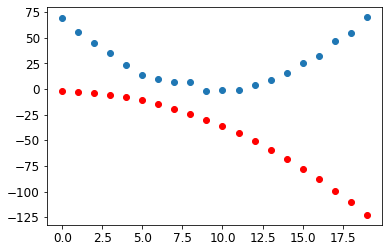

In [248]:
show_preds(preds_2nd)

we clearly need to repeat multiple times.Lets create a function to apply one step:

In [249]:
def apply_step(params, prn=True):
    preds = f(time,params)
    loss=mse(preds,speed)
    loss.backward()
    params.data -=lr*params.grad.data
    params.grad=None
    if prn:print(loss.item())
    return preds

##### Repeat the process

In [250]:
for i in range(10): apply_step(params)

7263.0693359375
1953.14453125
948.3409423828125
758.1979370117188
722.2137451171875
715.401123046875
714.1085205078125
713.860595703125
713.8102416992188
713.7973022460938


In [251]:
#hide
params = orig_params.detach().requires_grad_()

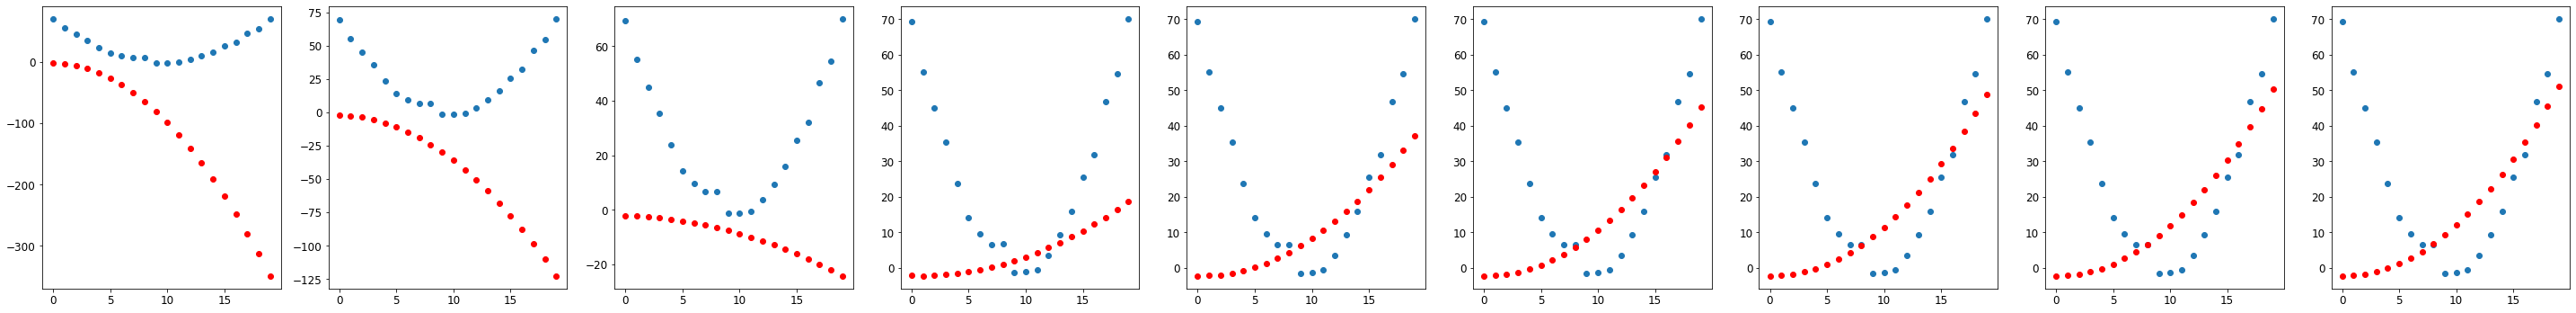

In [252]:
_,axs = plt.subplots(1,9,figsize=(40,5))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## The MNIST Loss Function

In [253]:
train_x = torch.cat([stacked_zeros,stacked_ones,stacked_two,stacked_threes,stacked_fours,stacked_fives,stacked_six, stacked_sevens,stacked_eights,stacked_nines]).view(-1, 28*28)

In [254]:
train_x.shape # each row represents an image now.

torch.Size([30729, 784])

In [255]:
train_y = tensor([0]*len(zero) + [1]*len(one)+ [2]*len(two)+ [3]*len(three)+ [4]*len(four)+ [5]*len(five)+ [6]*len(six)+ [7]*len(seven)+ [8]*len(eight)+ [9]*len(nine)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([30729, 784]), torch.Size([30729, 1]))

In [256]:
#Dataset in pytorch is required to return a tuple of (x,y) when indexed.SO we will use zip
"""zip function The zip function in Python is used to combine elements from multiple iterables (like lists, tuples, etc.) into tuples. It aggregates elements from each iterable into a single tuple and returns an iterator of these tuples"""
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y #784 is the total pixels of an image, 0 represnts it's an image of zero

(torch.Size([784]), tensor([0]))

In [257]:
valid_x = torch.cat([valid_0_tens,valid_1_tens,valid_2_tens,valid_3_tens,valid_4_tens,valid_5_tens,valid_6_tens,valid_7_tens,valid_8_tens,valid_9_tens]).view(-1, 28*28)
valid_y =tensor([0]*len(valid_0_tens) + [1]*len(valid_1_tens)+ [2]*len(valid_2_tens)+ [3]*len(valid_3_tens)+ [4]*len(valid_4_tens)+ [5]*len(valid_5_tens)+ [6]*len(valid_6_tens)+ [7]*len(valid_7_tens)+ [8]*len(valid_8_tens)+ [9]*len(valid_9_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

#### INITIALIZING PARAMS

In [258]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [259]:
#since for every pixels there must be some weights assigned
weights = init_params((28*28,10))
bias = init_params(10)

In neural networks, the w in the equation y=w*x+b is called the weights, and the b is called the bias. Together, the weights and bias make up the parameters.

In [260]:
#for one image:pred
(train_x[0]*weights.T).sum()+bias

tensor([-29.0862, -29.4093, -26.2552, -26.9425, -28.2731, -29.9928, -28.7794, -27.5331, -26.4005, -29.2483], grad_fn=<AddBackward0>)

while we can use python for loop for looping over all the training samples and calculate the predection but that will be very slow.cuz python loop don't run on the GPU and also because python is slow language for loops in general.
There is an extreamly convinient mathematical operations that calcs w*x for every row of a matrix-it's matx mult

In [261]:
def linear1(xb): return xb@weights + bias # '@' operator is mat mult operator
preds = linear1(train_x)
preds.shape

torch.Size([30729, 10])

In [262]:
#acc check
# Determine predicted classes
pred_classes = torch.argmax(preds,dim=1).unsqueeze(1)

correct_preds = pred_classes==train_y
correct_preds

tensor([[ True],
        [ True],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [263]:
pred_classes[0:4],train_y[0:4]

(tensor([[0],
         [0],
         [3],
         [3]]),
 tensor([[0],
         [0],
         [0],
         [0]]))

In [264]:
pred_classes.shape,train_y.shape

(torch.Size([30729, 1]), torch.Size([30729, 1]))

#### Wht can't we use metrics as our loss function

The gradient/derivative of a function is it's slope, or steepness which can also be defined as rise over run.Mathematically it can be written as :(y_new - y_old) / (x_new - x_old).
This formula gives us an intuition about when x_new is only slightly different from x_old which is the difference will be very small. We know that accuracy only changes when prediction changes from one digit to others. So the problem arises, small change is weights(x) won't effect the output(y) so the y_new - y_old will usally be zero most of the cases.Which means the gradient will be zero on most of the cases.


In [352]:
def mnist_loss(predictions, targets):
    return F.cross_entropy(predictions, targets.view(-1))

Pytorch class Dataloader helps us suffling of the order of training point in each epoch and mini-batch collation for us.

In [353]:
dl=DataLoader(dset, batch_size=256)


In [279]:
xb,yb = first(dl)
xb.shape, yb.shape #256 is total image in this batch, 784 is total pixel of an image

(torch.Size([256, 784]), torch.Size([256, 1]))

In [280]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [281]:
"""Mini batch of size-4 for testing"""
batch = train_x[:4]
batch

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [282]:
preds = linear1(batch)

In [283]:
pred_classes = torch.argmax(preds,dim=1).unsqueeze(1)
pred_classes.float()

tensor([[0.],
        [0.],
        [3.],
        [3.]])

In [287]:
train_y

tensor([[0],
        [0],
        [0],
        ...,
        [9],
        [9],
        [9]])

In [293]:
loss = mnist_loss(preds,train_y[0:4].view(-1))

In [294]:
loss




tensor(4.8169, grad_fn=<NllLossBackward0>)

In [295]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb.view(-1))
    loss.backward()

In [296]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(4.8657e-10),
 tensor([-7.4801e-01,  1.6734e-03,  3.7248e-03,  5.2300e-01,  3.1219e-10,  2.2080e-02,  9.8985e-02,  1.8343e-07,  3.8429e-06,  9.8550e-02]))

In [297]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [301]:
def batch_accuracy(xb, yb):
    pred_classes = torch.argmax(xb,dim=1).unsqueeze(1)
    correct_preds = pred_classes==yb

    return correct_preds.float().mean()

In [302]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [303]:
a=linear1()

In [306]:
pred_classes = torch.argmax(a)

In [307]:
pred_classes

tensor(0)

In [314]:
train_y[0]

tensor([0])

In [315]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [318]:
validate_epoch(linear1)*100

8.76

In [319]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.1747

In [327]:
for i in range(10):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.6313 0.6314 0.6315 0.6317 0.6317 0.6318 0.632 0.6319 0.6322 0.6324 

### Creating an Optimizer

In [329]:
linear_model = nn.Linear(28*28,10)

In [330]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([10, 784]), torch.Size([10]))

In [331]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [332]:
opt = BasicOptim(linear_model.parameters(), lr)

In [333]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [334]:
validate_epoch(linear_model)

0.1939

In [335]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [341]:
train_model(linear_model,100)

0.6168 0.6171 0.6172 0.6174 0.6177 0.6178 0.6181 0.6181 0.6183 0.6184 0.6186 0.6188 0.6189 0.6191 0.6192 0.6194 0.6195 0.6197 0.6198 0.6201 0.6203 0.6205 0.6206 0.6209 0.6211 0.6214 0.6215 0.6216 0.6217 0.6219 0.6218 0.6221 0.6223 0.6223 0.6224 0.6226 0.6228 0.6229 0.6232 0.6233 0.6234 0.6235 0.6236 0.6239 0.6239 0.6241 0.6244 0.6245 0.6245 0.6246 0.6249 0.6251 0.6252 0.6253 0.6255 0.6255 0.6255 0.6258 0.6259 0.6261 0.6262 0.6265 0.6265 0.6267 0.6269 0.6271 0.6273 0.6272 0.6271 0.6273 0.6273 0.6275 0.6277 0.6279 0.6279 0.6276 0.6277 0.6278 0.628 0.6281 0.6282 0.6283 0.6284 0.6286 0.6288 0.6289 0.6289 0.6291 0.6291 0.6293 0.6294 0.6296 0.6298 0.6299 0.63 0.6302 0.6302 0.6304 0.6305 0.6306 

In [342]:
validate_epoch(linear_model)

0.6306

In [343]:
dls = DataLoaders(dl, valid_dl)

In [358]:
learn = Learner(dls, nn.Linear(28*28,10), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [359]:
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,1.628168,19.663557,0.149534,00:00
1,0.778514,17.239485,0.207372,00:00
2,0.618744,13.853693,0.275050,00:00
3,0.544276,11.198915,0.341772,00:00
4,0.494687,9.635878,0.391753,00:00
5,0.460384,8.635919,0.431451,00:00
6,0.435609,8.092257,0.454238,00:00
7,0.416531,7.611734,0.470090,00:00
8,0.400270,7.209006,0.482969,00:00
9,0.386571,6.898405,0.491784,00:00


## Adding a Nonlinearity

In [429]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10),
    nn.ReLU(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,10),
)

In [430]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [434]:
#hide_output
learn.fit(100, 0.01)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.109691,0.835250,0.790783,00:00
1,0.109126,0.834320,0.791193,00:00
2,0.108546,0.834305,0.791363,00:00
3,0.107977,0.830904,0.792183,00:00
4,0.107382,0.828313,0.793037,00:00
5,0.106800,0.828306,0.793584,00:00
6,0.106245,0.827148,0.794097,00:00
7,0.105685,0.826632,0.794302,00:00
8,0.105117,0.824409,0.794848,00:00
9,0.104549,0.824153,0.795019,00:00


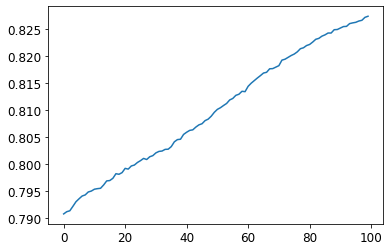

In [435]:
plt.plot(L(learn.recorder.values).itemgot(2));


In [436]:
learn.recorder.values[-1][2]

0.8274059891700745

In [441]:
(path).ls()

(#3) [Path('testing'),Path('training'),Path('validation')]

In [442]:
dls = ImageDataLoaders.from_folder(
    path,             # Root path (optional if you define train/valid)
    train='training', # Training folder
    valid='validation', # Validation folder # Apply data augmentations
)
learn = vision_learner(dls,resnet18,pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)

In [443]:
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.182791,0.087373,0.977315,06:27


In [470]:
def predict(x):
    pred=linear_model(valid_x[x])
    pred_classes = torch.argmax(pred)
    print(f'The predicted class is: {pred_classes}')



In [476]:
df= pd.DataFrame(valid_x[9000].view(28,28))
df
df.style.set_properties(**{'font-size':'5pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152941,0.894118,0.996078,0.615686,0.490196,0.490196,0.415686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156863,0.890196,0.992157,0.992157,0.992157,0.992157,0.992157,0.988235,0.972549,0.607843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.988235,0.607843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027451,0.231373,0.909804,0.992157,0.898039,0.878431,0.992157,0.992157,0.992157,0.992157,0.949020,0.180392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078431,0.098039,0.078431,0.070588,0.521569,0.992157,0.992157,0.992157,0.992157,0.431373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023529,0.705882,0.992157,0.992157,0.992157,0.431373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.662745,0.992157,0.992157,0.992157,0.431373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [477]:
predict(9000)

The predicted class is: 2
